<a href="https://colab.research.google.com/github/Shavedha/mnist-classification/blob/main/Ex_03_DL_March_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

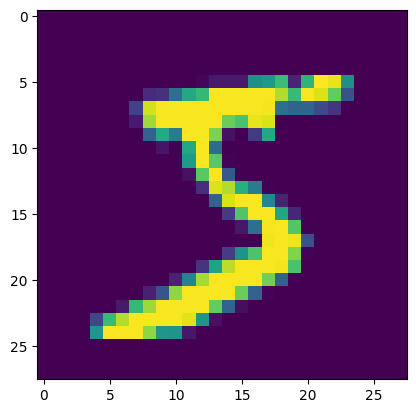

In [7]:
plt.imshow(single_image)

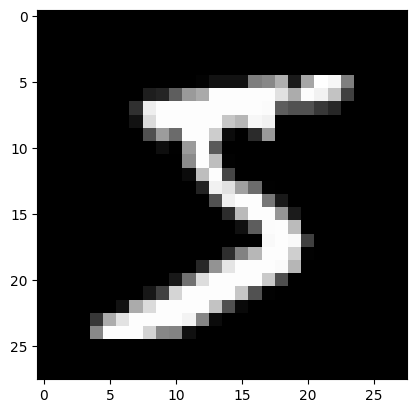

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0                  #for changing colour image to gray scale image
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

In [19]:
y_test_onehot.shape

(10000, 10)

In [20]:
y_train.shape

(60000,)

In [21]:
y_test.shape

(10000,)

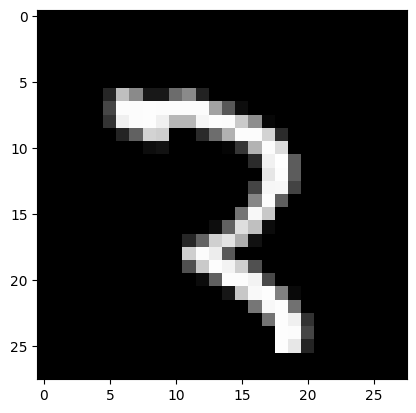

In [22]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [23]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)               #reshaping the ip values with h,w,depth
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)                 # -1 will take all the images in the folder

In [25]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))  # shape of the image
model.add(layers.Conv2D(filters=45,kernel_size=(7,7),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))     #reduces the size of the image. -> Here 2,2 will reduce the image size into half
model.add(layers.Flatten())
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))    # since 10 different classes are present 10 neurons should be present at op layer



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 45)        2250      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 45)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5445)              0         
                                                                 
 dense (Dense)               (None, 12)                65352     
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                        

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [28]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 64s 66ms/step - loss: 0.3968 - accuracy: 0.8757 - val_loss: 0.1251 - val_accuracy: 0.9623
Epoch 2/5
938/938 [==============================] - 38s 41ms/step - loss: 0.1009 - accuracy: 0.9703 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0633 - val_accuracy: 0.9822
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0543 - val_accuracy: 0.9816
Epoch 5/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0542 - val_accuracy: 0.9836


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.396776,0.875683,0.125064,0.9623
1,0.100931,0.970250,0.077961,0.9764
2,0.070664,0.978567,0.063284,0.9822
3,0.057317,0.982900,0.054290,0.9816
4,0.046730,0.985933,0.054176,0.9836


Shavedha Y - 212221230095


<Axes: >

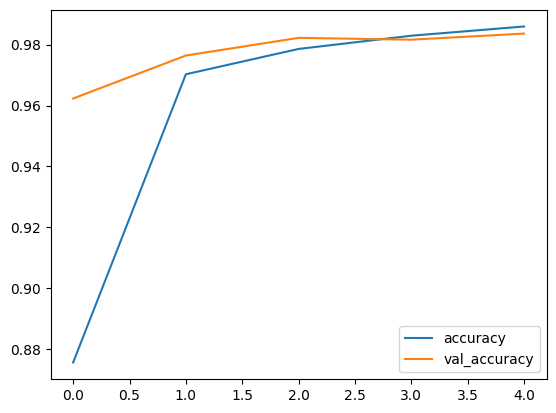

In [31]:
print("Shavedha Y - 212221230095")
metrics[['accuracy','val_accuracy']].plot()

Shavedha Y - 212221230095


<Axes: >

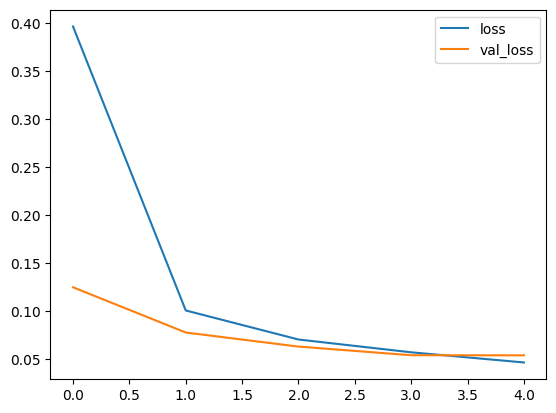

In [32]:
print("Shavedha Y - 212221230095")
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 7ms/step


In [34]:
print("Shavedha Y - 212221230095")
print(confusion_matrix(y_test,x_test_predictions))


Shavedha Y - 212221230095
[[ 973    0    2    0    1    0    3    0    0    1]
 [   0 1127    1    1    1    0    0    1    3    1]
 [   2    0 1025    0    2    0    0    2    1    0]
 [   0    0   11  987    0    7    0    0    3    2]
 [   0    0    0    0  980    0    0    0    0    2]
 [   3    0    1    7    0  854   17    0    4    6]
 [   3    2    0    0    3    1  948    0    1    0]
 [   0    1    8    2    0    0    0 1012    1    4]
 [   3    1    4    0    2    0    6    2  953    3]
 [   3    2    1    2   15    2    0    3    4  977]]


In [35]:
print("Shavedha Y - 212221230095")
print(classification_report(y_test,x_test_predictions))

Shavedha Y - 212221230095
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Testing with handwritten Image

In [37]:
img = image.load_img('img4.jpg')

In [38]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [39]:
img = image.load_img('/content/img4.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)



In [41]:
print(x_single_prediction)


[5]


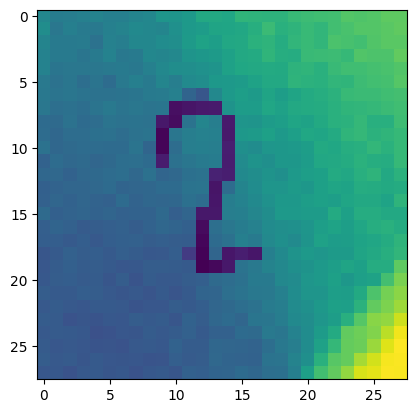

In [42]:
plt.imshow(img_28_gray_scaled)

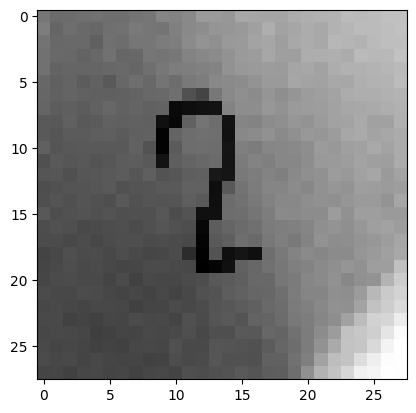

In [43]:
print("Shavedha Y - 212221230095")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [44]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [46]:
print(x_single_prediction)

[3]
